In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np


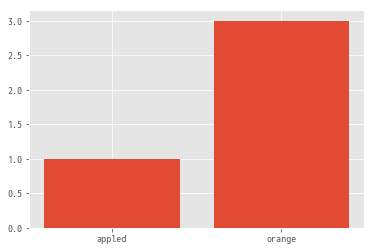

In [2]:
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = [1, 2]
y = [1, 3]

# ラベルの設定
labels = ['appled', 'orange']
ax.bar(x, y, tick_label=labels)

plt.show()


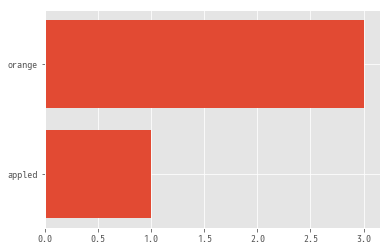

In [3]:
# 横向きグラフのsample
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = [1, 2]
y = [1, 3]

# ラベルの設定
labels = ['appled', 'orange']
ax.barh(x, y, tick_label=labels)

plt.show()


In [4]:
dfac = pd.read_csv('../sample_data/anime_master.csv')
dfac.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


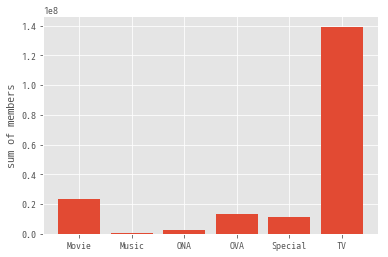

In [5]:
# 配給種別ごとにメンバ数の合計値を算出して棒グラフにする
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)

y = dfac.groupby('type').sum()['members']
type_count = len(y)
x = range(type_count)
xlabels = y.index

ax2.bar(x, y, tick_label=xlabels)
ax2.set_ylabel('sum of members')

plt.show()


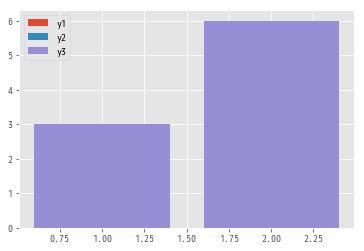

In [6]:
# 複数人グループの棒グラフの描画(ダメな例)
# データセットの作成
x = [1, 2]
y1, y2, y3 = [1, 2], [2, 4], [3, 6]

# 複数グループの棒グラフの描画
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)

w = 0.2
ax3.bar(x, y1, label='y1')
ax3.bar(x, y2, label='y2')
ax3.bar(x, y3, label='y3')

ax3.legend()

plt.show()

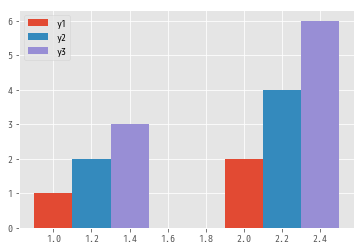

In [7]:
# 複数グループの棒グラフの描画(良いな例)
# データセットの作成
x = [1, 2]
y1, y2, y3 = [1, 2], [2, 4], [3, 6]

# 複数グループの棒グラフの描画
fig4 = plt.figure()
ax4  = fig4.add_subplot(1, 1, 1)

w = 0.2
ax4.bar(x                  , y1, width = w, label='y1')
ax4.bar(np.array(x) + w    , y2, width = w, label='y2')
ax4.bar(np.array(x) + w * 2, y3, width = w, label='y3')
# 補足: np.array(x) + w とすることで、[1.2, 2.2] の様に幅分だけずらしたx座標を指定している

ax4.legend()

plt.show()

In [8]:
dfag = pd.read_csv('../sample_data/anime_genre_top10_pivoted.csv', index_col='genre')

dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


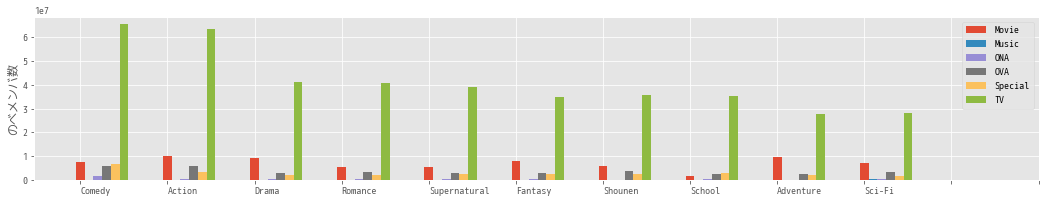

In [9]:
# 複数グループの棒グラフの描画(配給種別、ジャンル別グラフの描画)

fig5 = plt.figure(figsize=(18, 3))
ax5 = fig5.add_subplot(1, 1, 1)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
  ax5.bar(wt, dfag[i], width=w, label=i)
  wt = wt + w

ax5.set_xticks(np.array(range(len(dfag)+2)))
ax5.set_xticklabels(dfag.index, ha='left')
ax5.set_ylabel('のべメンバ数')

ax5.legend()

plt.show()

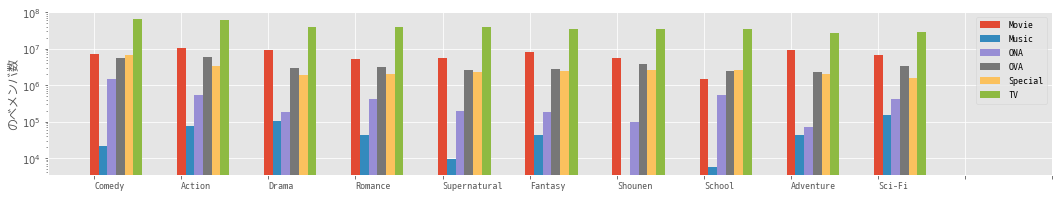

In [10]:
# 複数グループの棒グラフの描画(配給種別、ジャンル別グラフの描画 log scale)

fig6 = plt.figure(figsize=(18, 3))
ax6 = fig6.add_subplot(1, 1, 1)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
  ax6.bar(wt, dfag[i], width=w, label=i)
  wt = wt + w

ax6.set_xticks(np.array(range(len(dfag)+2)))
ax6.set_xticklabels(dfag.index, ha='left')
ax6.set_ylabel('のべメンバ数')
ax6.set_yscale('log')

ax6.legend()

plt.show()